In [ ]:
from sklearn.metrics import f1_score, classification_report
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NNDL_Project/New_Results /test_video_0000_result.csv")
df = df[df['frame_label'].notna()]
df['frame_label'] = df['frame_label'].astype(int)  
y_true, y_pred = list(df['frame_label']), list(df['predicted_label'])
report = classification_report(y_true, y_pred,output_dict=True)
report_df = pd.DataFrame(report).transpose() 
report_df

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,0.000000
1,0.713142,0.717981,0.715554,2358.000000
2,0.333333,0.020654,0.038898,1162.000000
accuracy,0.487784,0.487784,0.487784,0.487784
macro avg,0.348825,0.246212,0.251484,3520.000000
weighted avg,0.587762,0.487784,0.492180,3520.000000


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NNDL_Project/New_Results /test_video_0000_result.csv")
df.isnull().any(axis=1).sum()

1944

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,frame_number,frame_label,predicted_label
0,0,0,2.0,2.0
1,1,1,2.0,2.0
2,2,2,2.0,2.0
3,3,3,2.0,0.0
4,4,4,2.0,2.0


In [ ]:
df['frame_label'] = df['frame_label'].astype(int)  
y_true, y_pred = list(df['frame_label']), list(df['predicted_label'])

In [ ]:
import glob
import pandas as pd
result_files = glob.glob("/content/drive/MyDrive/NNDL_Project/New_Results /*")
print(len(result_files))
result_files.sort()
weighted_f1_score = []
disec_prec = []
knot_prec = []
needle_prec = []
disec_recall = []
knot_recall = []
needle_recall = []
for file_path in result_files:
  df = pd.read_csv(file_path)
  #df = df[df['frame_label'].notna()]
  df = df.dropna()
  df['frame_label'] = df['frame_label'].astype(int)  
  y_true, y_pred = list(df['frame_label']), list(df['predicted_label'])
  report = classification_report(y_true, y_pred,output_dict=True)
  report_df = pd.DataFrame(report).transpose() 
  weighted_f1_score.append(round(report_df['f1-score']['weighted avg'],2))
  try:
    if report_df['support'][0]!=0:
      disec_prec.append(round(report_df['precision'][0],2))
  except:
    pass
  try:
    if report_df['support'][1]!=0:
      knot_prec.append(round(report_df['precision'][1],2))
  except:
    pass
  try:
    if report_df['support'][2]!=0:
      needle_prec.append(round(report_df['precision'][2],2))
  except:
    pass
  try:
    if report_df['support'][0]!=0:
      disec_recall.append(round(report_df['recall'][0],2))
  except:
    pass
  try:
    if report_df['support'][1]!=0:
      knot_recall.append(round(report_df['recall'][1],2))
  except:
    pass
  try:
    if report_df['support'][2]!=0:
      needle_recall.append(round(report_df['recall'][2],2))
  except:
    pass

16


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe

In [ ]:
print(weighted_f1_score)

In [ ]:
len(weighted_f1_score)

16

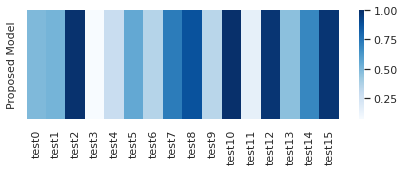

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(7,2)})
x_axis_labels = ['test0','test1','test2','test3','test4','test5','test6','test7','test8','test9','test10',
                 'test11','test12','test13','test14','test15']
y_axis_labels = ['Proposed Model']
heat_map = sns.heatmap([weighted_f1_score],cmap="Blues",xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=90)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
disection_precison  = sum(disec_prec)/len(disec_prec)
knot_precison  = sum(knot_prec)/len(knot_prec)
needle_precison = sum(needle_prec)/len(needle_prec)

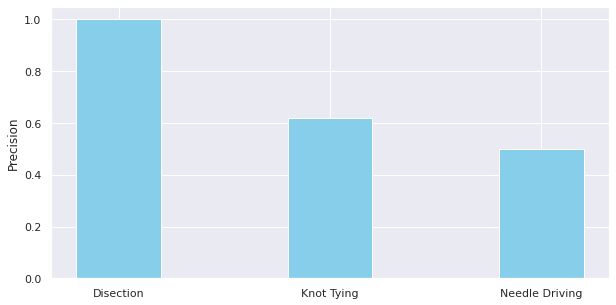

In [ ]:
task_name = ['Disection','Knot Tying','Needle Driving']
precison_values= [disection_precison,knot_precison,needle_precison]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(task_name, precison_values, color ='skyblue',
        width = 0.4)
plt.ylabel("Precision")
plt.show()

In [ ]:
disection_recall = sum(disec_recall)/len(disec_recall)
knot_recall = sum(knot_recall)/len(knot_recall)
needle_recall = sum(needle_recall)/len(needle_recall)

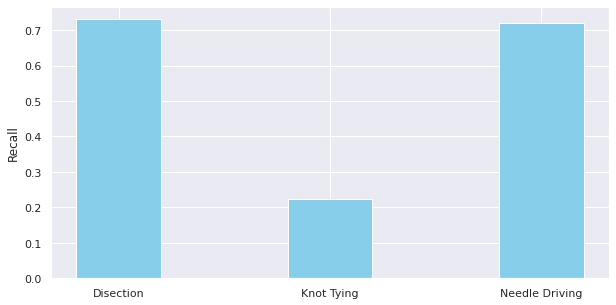

In [ ]:
task_name = ['Disection','Knot Tying','Needle Driving']
precison_values= [disection_recall,knot_recall,needle_recall]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(task_name, precison_values, color ='skyblue',
        width = 0.4)
plt.ylabel("Recall")
plt.show()

In [ ]:
import numpy as np
np.average(weighted_f1_score)

0.5787500000000001

In [ ]:
import numpy as np
np.average(weighted_f1_score)

0.5918749999999999

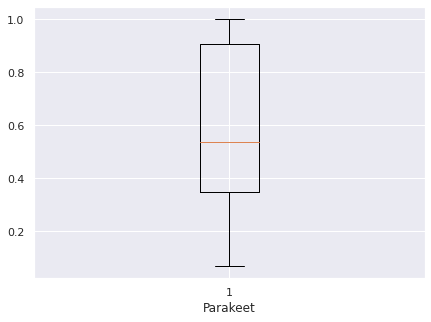

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(7, 5))
 
# Creating plot
plt.boxplot(weighted_f1_score)

plt.xlabel('Parakeet')
# show plot
plt.show()